In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy
import numpy
%matplotlib inline

In [2]:
sampling_rate = 22050

In [3]:
x_metal,sr=librosa.load("F:/ML/project/genres/metal/metal.00001.wav",sr=22050,mono=True,duration=8.0)
x_classical,sr=librosa.load("F:/ML/project/genres/classical/classical.00001.wav",sr=22050,mono=True,duration=8.0)

Text(0.5,1,'Classical')

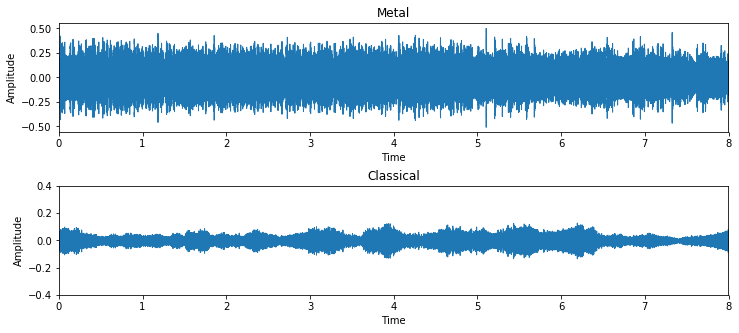

In [4]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2, 1, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_metal,sampling_rate)
plt.title('Metal')

plt.subplot(2, 1, 2)
plt.ylim(-0.4,0.4)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_classical,sampling_rate)
plt.title('Classical')

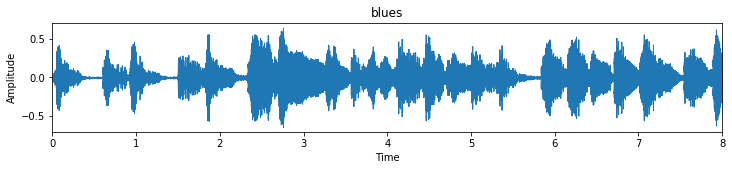

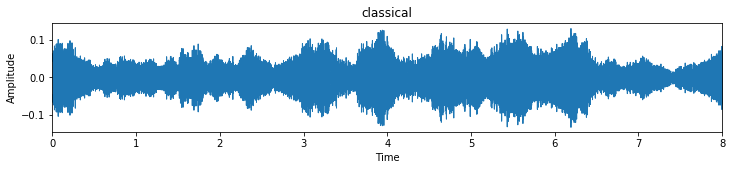

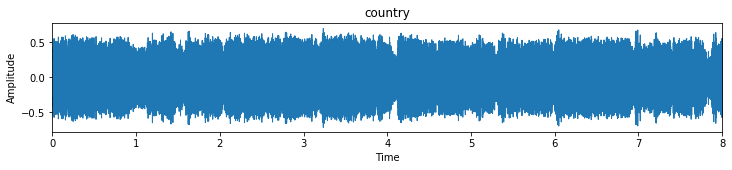

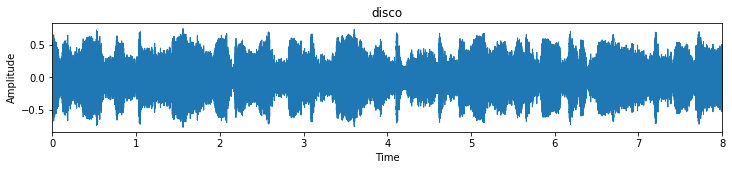

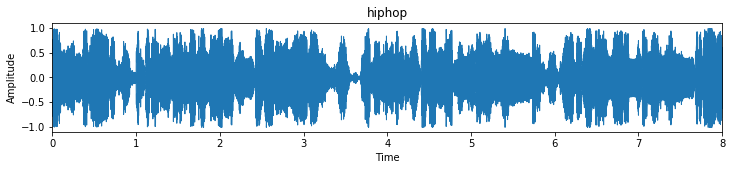

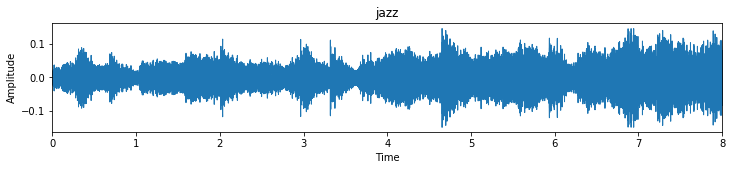

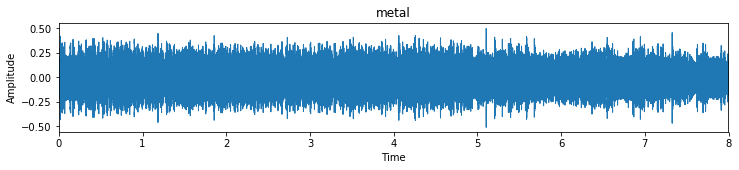

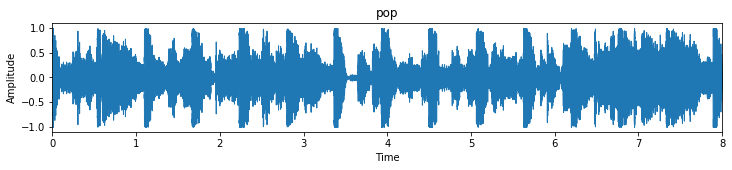

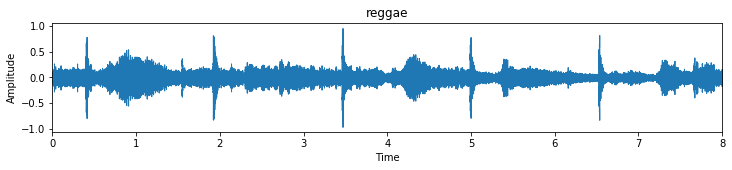

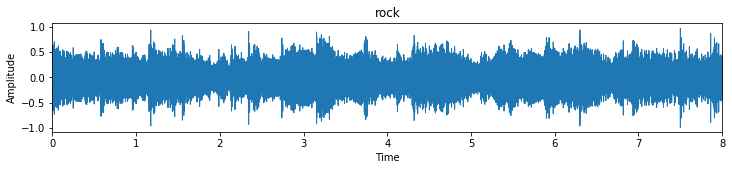

In [19]:
directory1="F:/ML/project/genres/"
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    directory=directory1+g+"/"+g+".00001.wav"
    x,sr=librosa.load(directory,sr=22050,mono=True,duration=8.0)
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(12,5))
    fig.subplots_adjust(hspace=.5)
    plt.subplot(2, 1, 1)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    librosa.display.waveplot(x,sampling_rate)
    plt.title(g)
    plt.savefig("Amplitude/"+g+'_amp.png',  bbox_inches='tight',dpi=250)

#### Determining ONSET

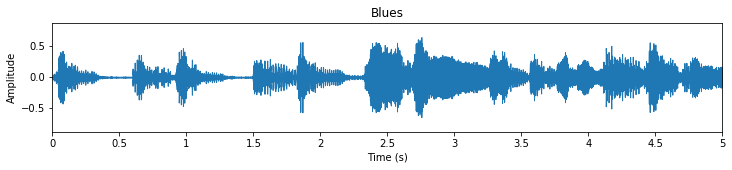

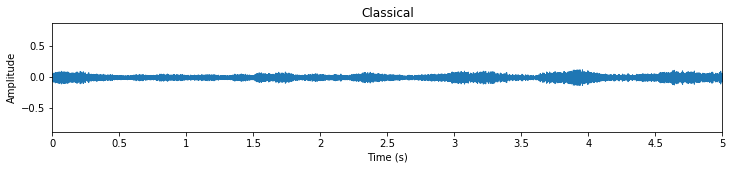

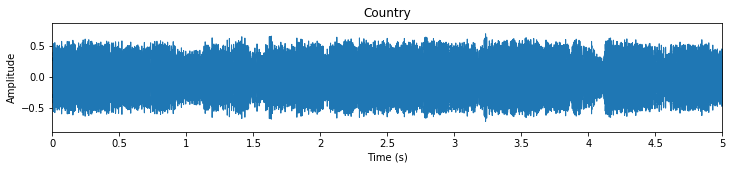

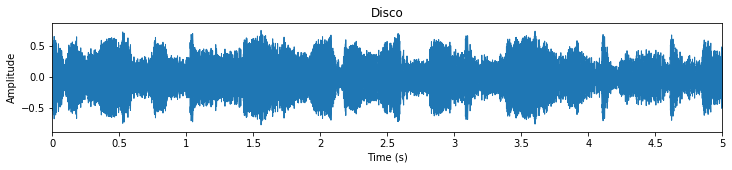

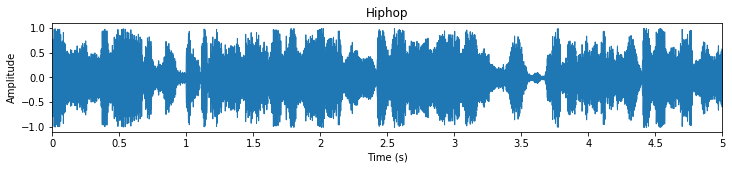

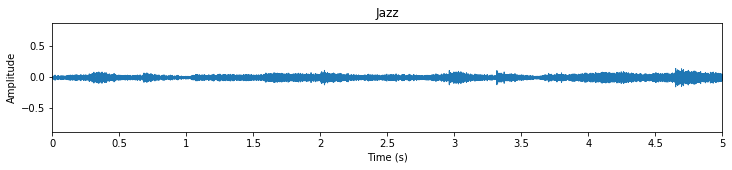

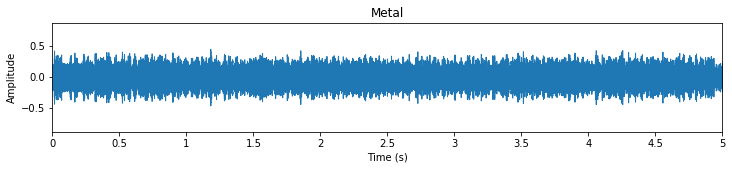

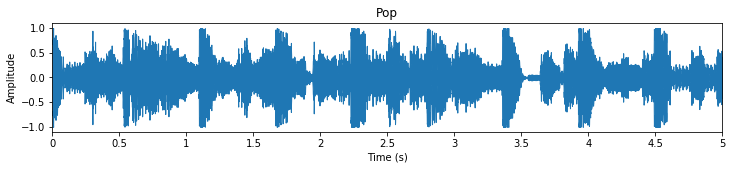

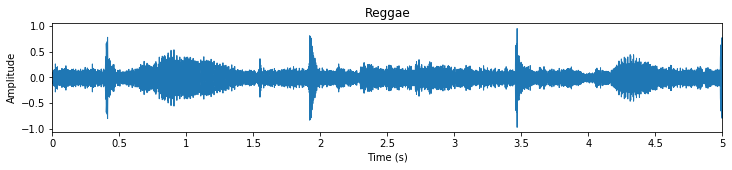

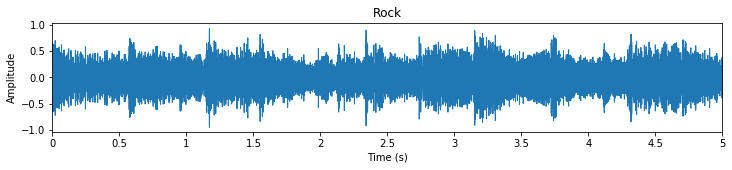

In [89]:
hop_size=512
#frame_size=2048
for g in genres:
    directory=directory1+g+"/"+g+".00001.wav"
    x,sr=librosa.load(directory,sr=22050,mono=True,duration=5.0)
    onset_frames = librosa.onset.onset_detect(x, sr=sampling_rate,hop_length=hop_size)
    onset_times = librosa.frames_to_time(onset_frames)
    #print(onset_frames)
    import matplotlib.pyplot as plt1
    fig=plt1.figure(figsize=(12,5))
    fig.subplots_adjust(hspace=.5)
    plt1.subplot(2,1,1)
    librosa.display.waveplot(x, sr=sampling_rate)
    plt1.vlines(onset_times*1000, -0.8, 0.79, color='red', alpha=0.8 )
    plt1.xlabel("Time (s)")
    plt1.ylabel("Amplitude")
    plt1.title(g.capitalize())
    

Text(0.5,1,'rock')

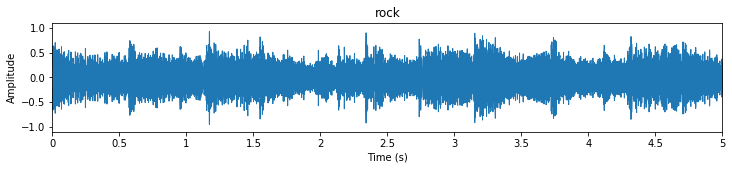

In [59]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)
plt.subplot(2,1,1)
librosa.display.waveplot(x, sr=sampling_rate)
plt.vlines(onset_times*1000, -1.0, 1.0, color='red', alpha=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(g)
#plt.savefig('acc.png',  bbox_inches='tight',dpi=250)

#### Fourier Transform and Spectrum

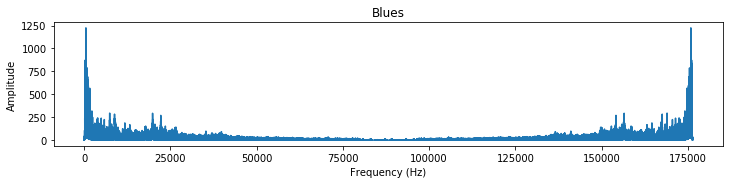

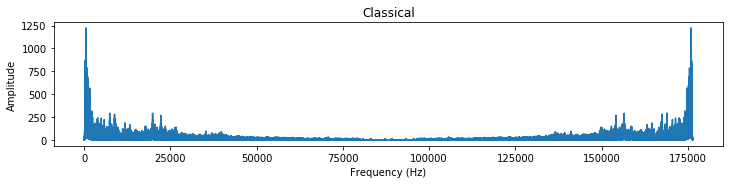

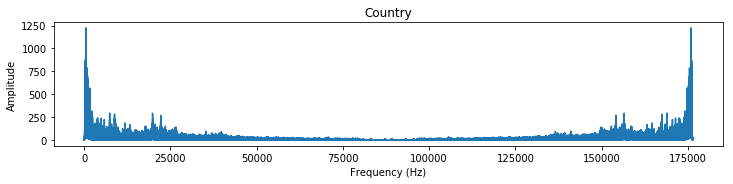

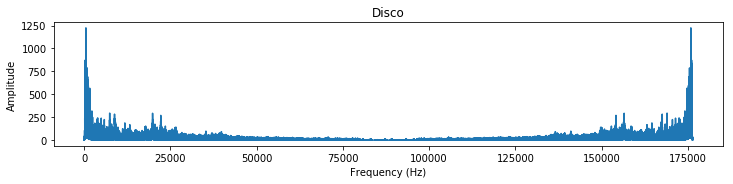

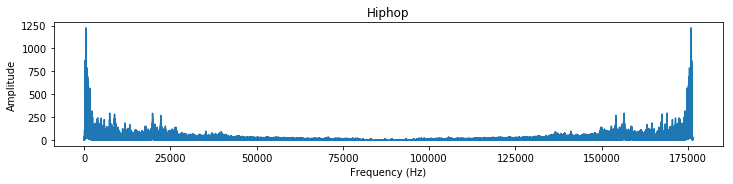

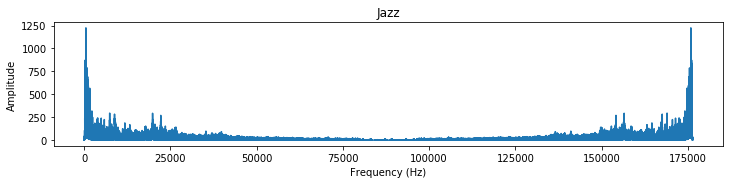

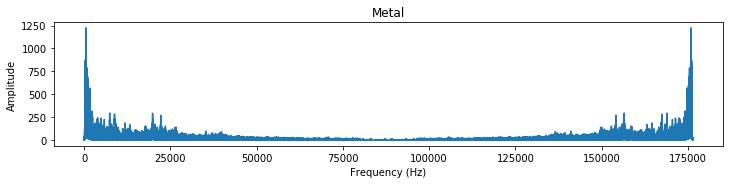

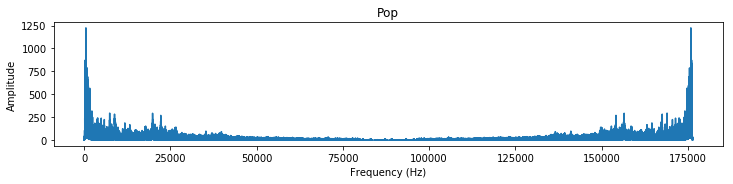

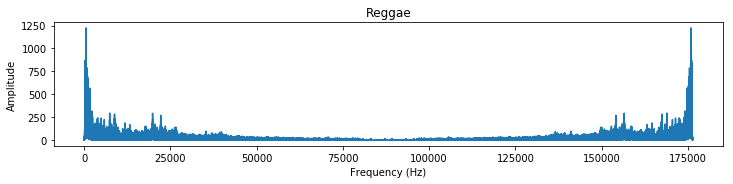

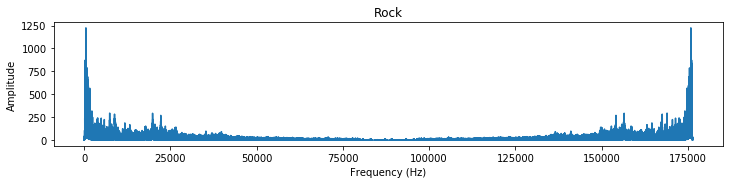

In [88]:
for g in genres:
    directory=directory1+g+"/"+g+".00001.wav"
    x,sr=librosa.load(directory,sr=22050,mono=True,duration=5.0)
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(12,5))
    plt.subplot(2,1,1)
    FFT=scipy.fft(x_metal)
    FFT_Mag=numpy.absolute(FFT)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(g.capitalize())
    plt.plot(FFT_Mag)

#### Short-Time Fourier Transform and Spectogram

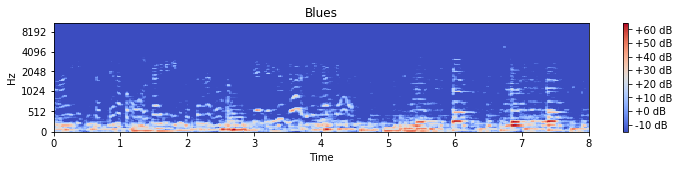

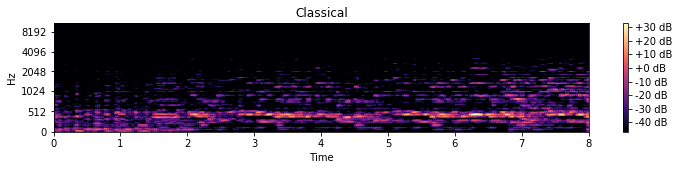

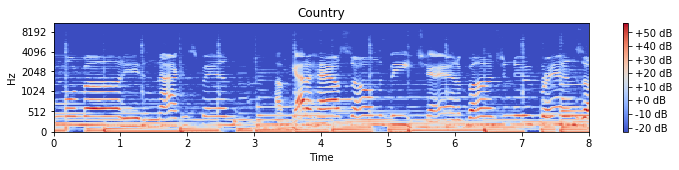

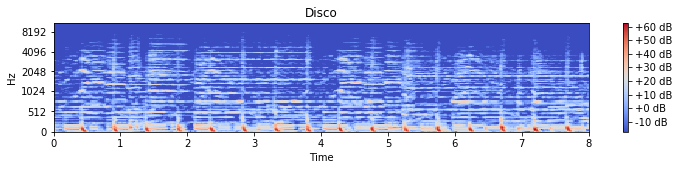

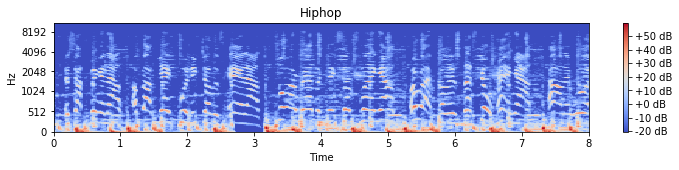

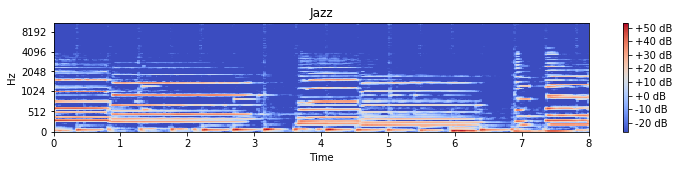

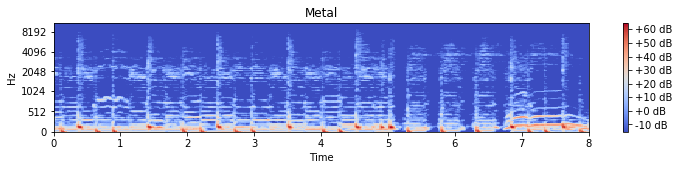

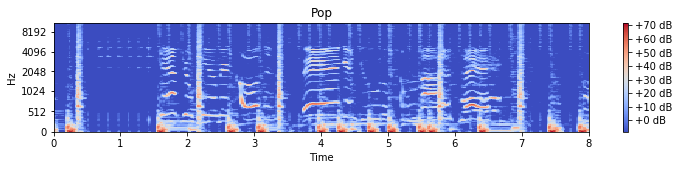

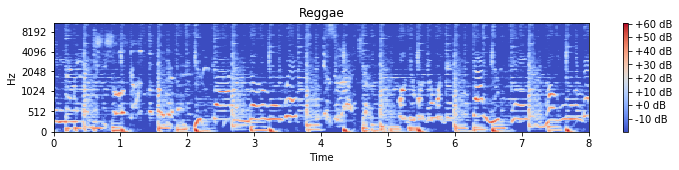

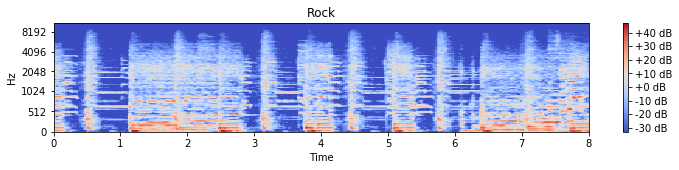

In [18]:
window_size=2048
for g in genres:
    directory=directory1+g+"/"+g+".00088.wav"
    x,sr=librosa.load(directory,sr=22050,mono=True,duration=8.0)
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(12,5))
    fig.subplots_adjust(hspace=.5)
    plt.subplot(2,1,1)
    S = librosa.feature.melspectrogram(x, sr=sampling_rate, n_fft=window_size)
    logS = librosa.amplitude_to_db(S)
    plt.title(g.capitalize())
    librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.savefig("STFT/"+g+'_stft.png',  bbox_inches='tight',dpi=250)
    

#### MFCC

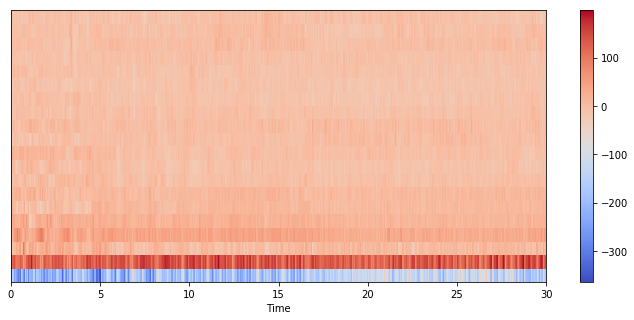

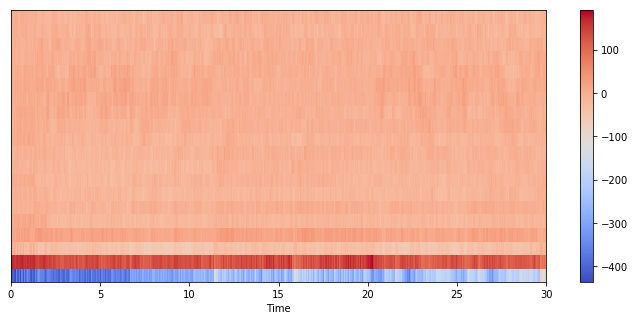

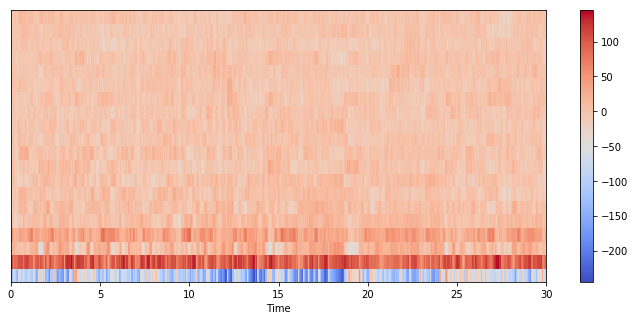

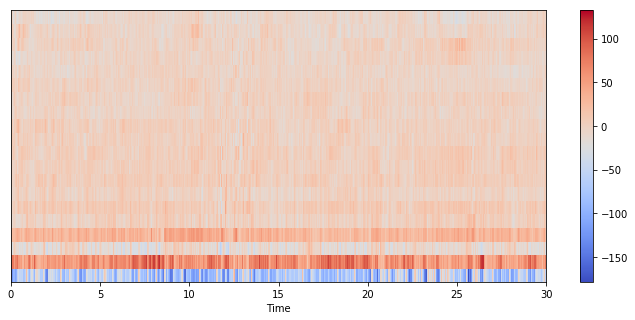

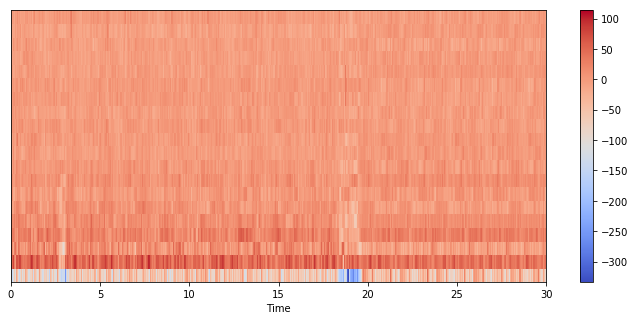

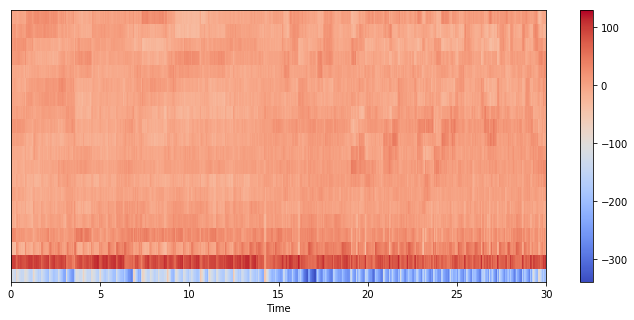

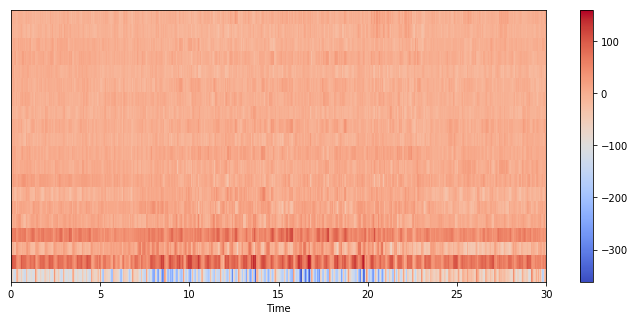

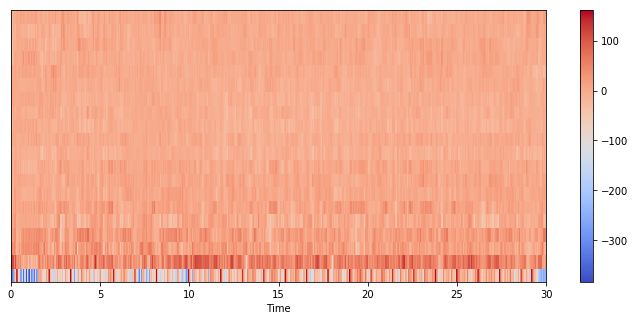

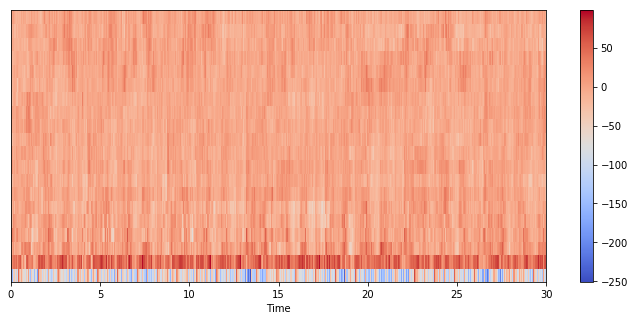

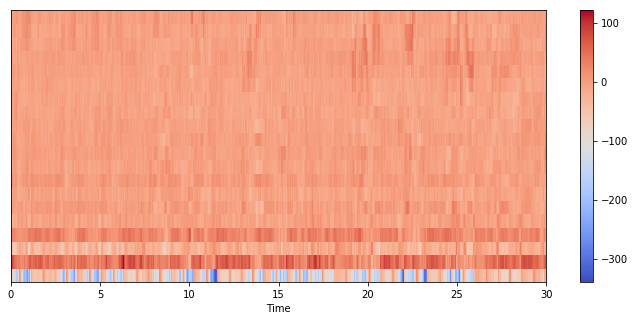

In [17]:
for g in genres:
    directory=directory1+g+"/"+g+".00088.wav"
    x,sr=librosa.load(directory,sr=22050,mono=True,duration=30.0)
    S = librosa.feature.melspectrogram(x, sr=sampling_rate)
    logS = librosa.amplitude_to_db(S)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mels=128,fmax=8000)
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(12,5))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.savefig("MFCC/"+g+'_mfcc.png',  bbox_inches='tight',dpi=250)
    